In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_db3aab955d234e4090c6889e4becd5ab = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0qYA2WzLGdxS-Yt5YW8YLrS3OLj_6CaCddRe4-zNxesk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_db3aab955d234e4090c6889e4becd5ab.get_object(Bucket='onlinepaymentsfrauddetection-donotdelete-pr-bwf5cppggzptbw',Key='PS_20174392719_1491204439457_logs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Online Payments Fraud Detection

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


## Importing Libraries¶

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
2429,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [8]:

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## EDA

## Checking for correlation¶

In [10]:
# checking for correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.352348,0.139868,-0.194391,-0.053366,-0.001745,0.788370
amount,0.352348,1.000000,0.703566,-0.023694,0.030711,0.274788,0.354960
oldbalanceOrg,0.139868,0.703566,1.000000,0.685439,0.075271,0.212087,0.105713
newbalanceOrig,-0.194391,-0.023694,0.685439,1.000000,0.127352,0.077034,-0.250987
oldbalanceDest,-0.053366,0.030711,0.075271,0.127352,1.000000,0.811400,-0.063175
newbalanceDest,-0.001745,0.274788,0.212087,0.077034,0.811400,1.000000,-0.015916
isFraud,0.788370,0.354960,0.105713,-0.250987,-0.063175,-0.015916,1.000000


## Heatmap

<AxesSubplot:>

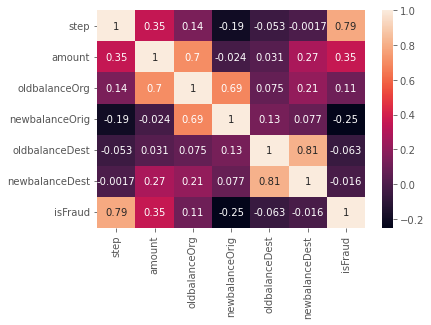

In [11]:
sns.heatmap(df.corr(),annot=True)

## Univariate analysis

<AxesSubplot:xlabel='step', ylabel='Count'>

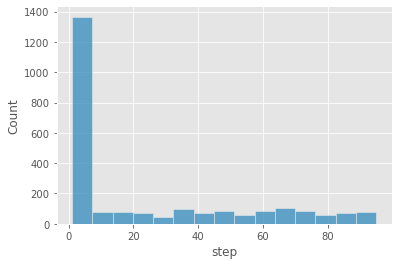

In [12]:
#step
sns.histplot(data=df,x='step')

<AxesSubplot:xlabel='step'>

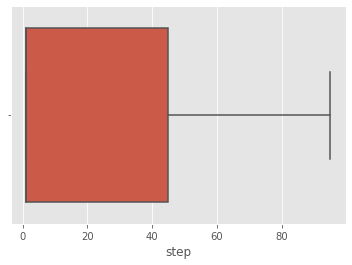

In [13]:
sns.boxplot(data=df,x='step')

<AxesSubplot:xlabel='type', ylabel='count'>

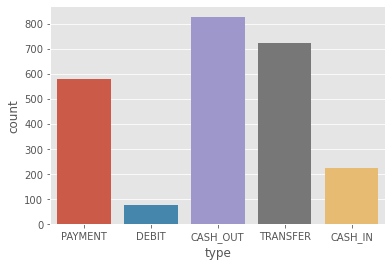

In [14]:
#type
sns.countplot(data=df,x='type')

<AxesSubplot:xlabel='amount', ylabel='Count'>

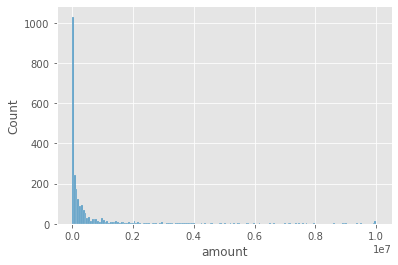

In [15]:
#amount
sns.histplot(data=df,x='amount')

<AxesSubplot:xlabel='amount'>

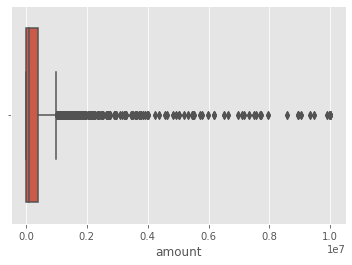

In [16]:
#amount
sns.boxplot(data=df,x='amount')

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Count'>

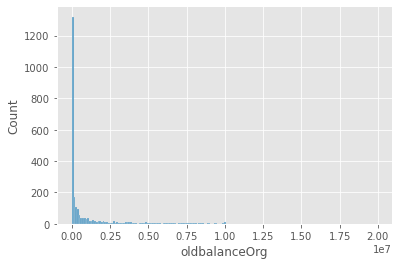

In [17]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [18]:
#nameDest
df['nameDest'].value_counts()

C1590550415    25
C985934102     22
C564160838     19
C451111351     17
C1023714065    15
               ..
M1113829504     1
M936219350      1
M178401052      1
M1888639813     1
C757947873      1
Name: nameDest, Length: 1870, dtype: int64

<AxesSubplot:xlabel='oldbalanceDest'>

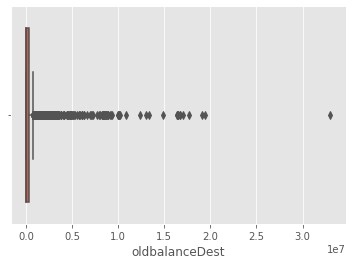

In [19]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<AxesSubplot:xlabel='newbalanceDest'>

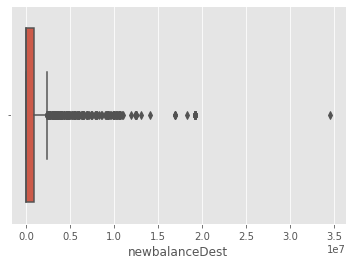

In [20]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

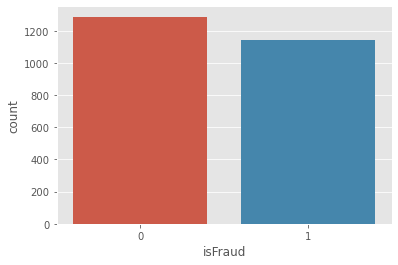

In [21]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [22]:
df['isFraud'].value_counts()

0    1288
1    1142
Name: isFraud, dtype: int64

In [23]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'


In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,is not Fraud
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,is Fraud
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,is Fraud
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,is Fraud
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,is Fraud


## Bivariate analysis

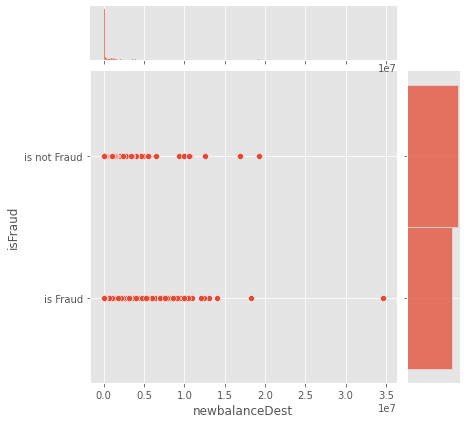

In [25]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<AxesSubplot:xlabel='type', ylabel='count'>

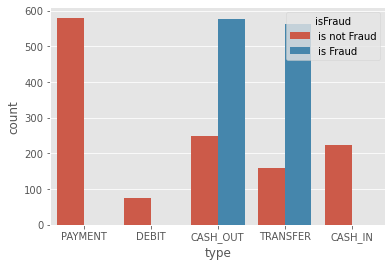

In [26]:
sns.countplot(data=df,x='type',hue='isFraud')

<AxesSubplot:xlabel='isFraud', ylabel='step'>

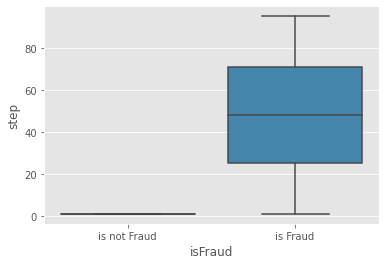

In [27]:
sns.boxplot(data=df,x='isFraud',y='step')

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

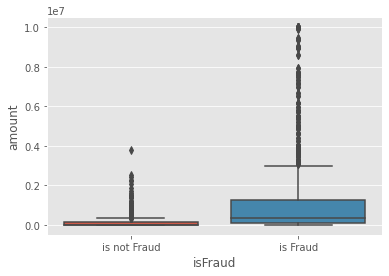

In [28]:
sns.boxplot(data=df,x='isFraud',y='amount')

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceOrg'>

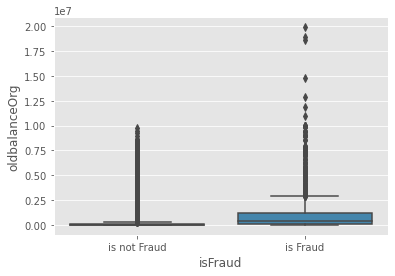

In [29]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceOrig'>

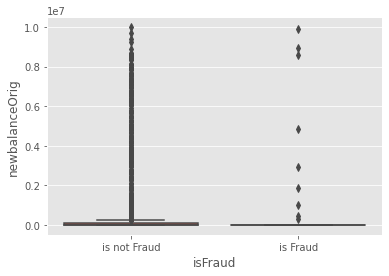

In [30]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceDest'>

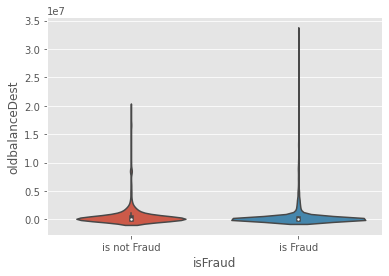

In [31]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceDest'>

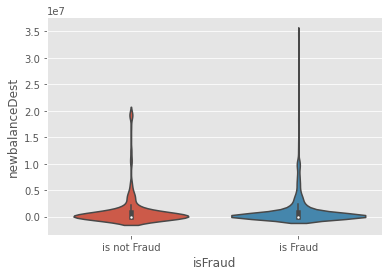

In [32]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

## Detecting the Outliers¶

<AxesSubplot:xlabel='amount'>

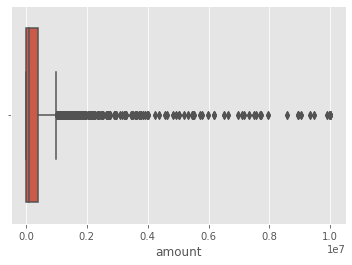

In [33]:
sns.boxplot(df['amount'])

In [34]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=array([10000000.]), count=array([14]))
625836.0974156366


In [35]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 9018.4925
q3 : 409609.8225
IQR : 400591.33
Upper Bound : 1010496.8175
Lower Bound : -591868.5025
Skewed data : 354
Skewed data : 0


In [36]:
# To handle outliers transformation techniques are used.

def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

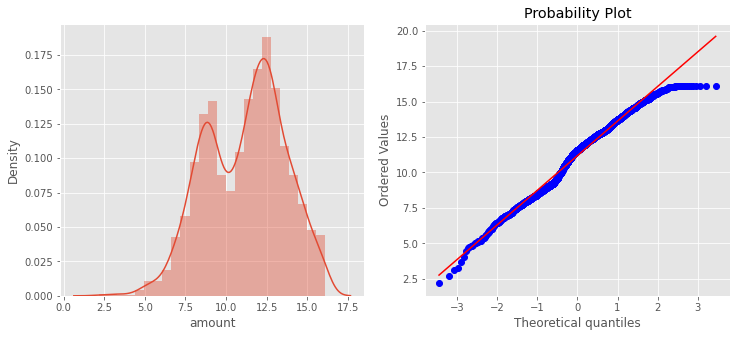

In [37]:
transformationPlot(np.log(df['amount']))

In [38]:
df['amount']=np.log(df['amount'])

## Statistical summery¶

In [39]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,2430.000000,2430,2430.000000,2430,2.430000e+03,2.430000e+03,2430,2.430000e+03,2.430000e+03,2430
unique,NaN,5,NaN,2430,NaN,NaN,1870,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1231006815,NaN,NaN,C1590550415,NaN,NaN,is not Fraud
freq,NaN,827,NaN,1,NaN,NaN,25,NaN,NaN,1288
mean,23.216049,NaN,11.184097,NaN,9.849040e+05,4.392755e+05,NaN,5.797246e+05,1.127075e+06,NaN
std,29.933036,NaN,2.463815,NaN,2.082361e+06,1.520978e+06,NaN,1.891192e+06,2.907401e+06,NaN
min,1.000000,NaN,2.166765,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.000000,NaN,9.107032,NaN,8.679630e+03,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,1.000000,NaN,11.569959,NaN,8.096250e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
75%,45.000000,NaN,12.922957,NaN,7.606258e+05,1.247804e+04,NaN,3.096195e+05,9.658701e+05,NaN


## Data Preprocessing

In [40]:
# Shape of csv data
df.shape

(2430, 10)

In [41]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [42]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9.194174,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,7.530630,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,PAYMENT,9.364617,41554.0,29885.86,0.0,0.0,is not Fraud
3,1,PAYMENT,8.964147,53860.0,46042.29,0.0,0.0,is not Fraud
4,1,PAYMENT,8.868944,183195.0,176087.23,0.0,0.0,is not Fraud


In [43]:
# Finding null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2430 non-null   int64  
 1   type            2430 non-null   object 
 2   amount          2430 non-null   float64
 3   oldbalanceOrg   2430 non-null   float64
 4   newbalanceOrig  2430 non-null   float64
 5   oldbalanceDest  2430 non-null   float64
 6   newbalanceDest  2430 non-null   float64
 7   isFraud         2430 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 152.0+ KB


## Object data labelencoding

In [45]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [46]:
df['type'].value_counts()

1    827
4    724
3    580
0    224
2     75
Name: type, dtype: int64

## dividing the dataset into dependent and independent y and x respectively

In [47]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [48]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,3,9.364617,41554.00,29885.86,0.00,0.00
3,1,3,8.964147,53860.00,46042.29,0.00,0.00
4,1,3,8.868944,183195.00,176087.23,0.00,0.00
...,...,...,...,...,...,...,...
2425,95,1,10.946325,56745.14,0.00,51433.88,108179.02
2426,95,4,10.424558,33676.59,0.00,0.00,0.00
2427,95,1,10.424558,33676.59,0.00,0.00,33676.59
2428,95,4,11.385084,87999.25,0.00,0.00,0.00


In [49]:
y

0       is not Fraud
1       is not Fraud
2       is not Fraud
3       is not Fraud
4       is not Fraud
            ...     
2425        is Fraud
2426        is Fraud
2427        is Fraud
2428        is Fraud
2429        is Fraud
Name: isFraud, Length: 2430, dtype: object

## Train test split¶

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1944, 7)
(486, 7)
(486,)
(1944,)


## Model Building

### 1.Random Forest classifier¶

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9958847736625515

In [53]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy


1.0

In [54]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,232,2
is not Fraud,0,252


In [55]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      1.00       234
is not Fraud       0.99      1.00      1.00       252

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



### 2.Decision tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy


0.9917695473251029

In [57]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy


1.0

In [58]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,231,3
is not Fraud,1,251


In [59]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       234
is not Fraud       0.99      1.00      0.99       252

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### 3.ExtraTrees Classifier

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy


0.9938271604938271

In [61]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy


1.0

In [62]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,231,3
is not Fraud,0,252


In [63]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       234
is not Fraud       0.99      1.00      0.99       252

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### 4. SupportVectorMachine Classifier

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.7901234567901234

In [65]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.8009259259259259

In [66]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,132,102
is not Fraud,0,252


In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       1.00      0.56      0.72       234
is not Fraud       0.71      1.00      0.83       252

    accuracy                           0.79       486
   macro avg       0.86      0.78      0.78       486
weighted avg       0.85      0.79      0.78       486



In [68]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [70]:
y_test1=la.transform(y_test)

In [71]:
y_test1

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [72]:
y_train1

array([0, 1, 0, ..., 1, 1, 0])

### 5.xgboost Classifier

In [73]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy


[11:01:46] WARNING: /opt/conda/conda-bld/xgboost-ext_1653306228864/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9979423868312757

In [74]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy


1.0

In [75]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,233,1
1,0,252


In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       252

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



### Compare Models

In [77]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))

In [78]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9958847736625515
train accuracy for dtc 1.0
test accuracy for dtc 0.9917695473251029
train accuracy for etc 1.0
test accuracy for etc 0.9938271604938271
train accuracy for svc 0.8009259259259259
test accuracy for svcc 0.7901234567901234
train accuracy for xgb1 1.0
test accuracy for xgb1 0.9979423868312757


In [79]:
import pickle
pickle.dump(svc,open('payments.pkl','wb'))

In [80]:
pwd

'/home/wsuser/work'

In [81]:
df.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.00,160296.36,0.0,0.00,is not Fraud
1,1,3,7.530630,21249.00,19384.72,0.0,0.00,is not Fraud
2,1,3,9.364617,41554.00,29885.86,0.0,0.00,is not Fraud
3,1,3,8.964147,53860.00,46042.29,0.0,0.00,is not Fraud
4,1,3,8.868944,183195.00,176087.23,0.0,0.00,is not Fraud
5,1,3,8.969751,176087.23,168225.59,0.0,0.00,is not Fraud
6,1,3,8.300121,2671.00,0.00,0.0,0.00,is not Fraud
7,1,2,8.582563,41720.00,36382.23,41898.0,40348.79,is not Fraud
8,1,2,9.174189,4465.00,0.00,10845.0,157982.12,is not Fraud
9,1,3,8.039148,20771.00,17671.03,0.0,0.00,is not Fraud


In [82]:
df.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2410,94,4,14.590090,2169679.91,0.0,0.00,0.00,is Fraud
2411,94,1,14.590090,2169679.91,0.0,0.00,2169679.91,is Fraud
2412,94,4,14.190236,1454592.61,0.0,0.00,0.00,is Fraud
2413,94,1,14.190236,1454592.61,0.0,264042.92,1718635.53,is Fraud
2414,94,4,13.040363,460635.82,0.0,0.00,0.00,is Fraud
2415,94,1,13.040363,460635.82,0.0,544728.69,1005364.51,is Fraud
2416,94,4,14.688284,2393539.65,0.0,0.00,0.00,is Fraud
2417,94,1,14.688284,2393539.65,0.0,5157128.07,7550667.73,is Fraud
2418,94,4,13.006408,445257.43,0.0,0.00,0.00,is Fraud
2419,94,1,13.006408,445257.43,0.0,0.00,445257.43,is Fraud


In [83]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,3,9.194174,170136.00,160296.36,0.0,0.00]])
print(svc.predict(features))

['is not Fraud']


In [84]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,4,14.590090,2169679.91,0.0,0.00,0.00]])
print(svc.predict(features))

['is Fraud']


In [85]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,2,9.138070,11299.00,1996.21,29832.0,16896.70]])
print(svc.predict(features))

['is not Fraud']


In [86]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,1,14.190236,1454592.61,0.0,264042.92,1718635.53]])
print(svc.predict(features))

['is Fraud']


In [87]:
import pickle
pickle.dump(svc,open('payments.pkl','wb'))

In [88]:
!tar -zcvf online_payments_fraud_detection_model_new.tgz payments.pkl

payments.pkl


In [89]:
ls-1

drug-classification-model_new.tgz
online
Online
online_payments_fraud_detection_model_new.tgz
payments.pkl


In [90]:
!pip install watson-machine-learning-client --upgrade

In [91]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "7nPw6r8tJxnZnPeATzKKr_2RwmleY94lY6TzsA7sFUK1"
}
client = APIClient(wml_credentials)

In [92]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [93]:
space_uid = guid_from_space_name(client, space_name='payment')
print("Space UID = " + space_uid)

Space UID = 235920b9-8151-459c-bef5-f53fe6671ee5


In [94]:
client.set.default_space(space_uid)

'SUCCESS'

In [95]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [96]:
import sklearn
sklearn.__version__

'1.0.2'

In [105]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [106]:
model_details = client.repository.store_model(model='online_payments_fraud_detection_model_new.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"onlinepaymentsfrauddetection",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=x_train,
                                              training_target=y_train)

In [107]:
model_id = client.repository.get_model_id(model_details)
model_id

'7d6f62dc-44e4-463b-be41-77d36fdbf856'

In [108]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"Online Payments Fraud Detection_deploy", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: '7d6f62dc-44e4-463b-be41-77d36fdbf856' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='45d58753-6745-46c3-a88f-36f5580cfd98'
------------------------------------------------------------------------------------------------




In [109]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1648,33,1,15.709885,6648389.90,0.00,2609209.55,9257599.45
921,1,3,7.955716,10646.00,7794.17,0.00,0.00
1743,39,1,10.571658,39013.30,0.00,924162.55,1089489.11
254,1,3,7.870456,21867.46,19248.70,0.00,0.00
1412,11,1,12.655294,313418.28,0.00,688164.64,1029922.17
...,...,...,...,...,...,...,...
1033,1,4,12.308874,22377.00,0.00,31493.45,49864.36
1731,38,1,12.916583,0.00,0.00,0.00,407005.78
763,1,3,8.553506,283509.00,278324.10,0.00,0.00
835,1,1,13.431455,0.00,0.00,844302.40,1412484.09


In [110]:
y_train

1648        is Fraud
921     is not Fraud
1743        is Fraud
254     is not Fraud
1412        is Fraud
            ...     
1033    is not Fraud
1731        is Fraud
763     is not Fraud
835     is not Fraud
1653        is Fraud
Name: isFraud, Length: 1944, dtype: object

In [111]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-06-27T11:23:12.990Z',
  'id': '7d6f62dc-44e4-463b-be41-77d36fdbf856',
  'modified_at': '2022-06-27T11:23:31.888Z',
  'name': 'onlinepaymentsfrauddetection',
  'owner': 'IBMid-672000RZJT',
  'resource_key': '96872363-057f-4f1d-beae-2a7c1cef1179',
  'space_id': '235920b9-8151-459c-bef5-f53fe6671ee5'},
 'system': {'warnings': []}}